In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import seaborn as sns
from scipy import stats

In [4]:
### turn off futurewarnings
from warnings import filterwarnings 
filterwarnings ('ignore')

In [5]:
# load dataset
url = "https://raw.githubusercontent.com/JQi-14/Culvert-ML-Project/main/686_full_data_raw_03_21_22.csv"
dataset = read_csv(url)

data1=dataset[[ 'Age_at_inspection', 'Slope_corrected', 'Material', 'Height', 'Length', 
'hydrologic_ordinal', 'Clog_score', 'clog_flooding_score_binary', 'Precipitation', 'Depth_ft']]

y=dataset['Overall_Risk_max']

names=[ 'Age at Inspection', 'Slope (%)', 'Material (Encoded)', 'Diameter (in.)', 
      'Length (ft)', 'Hydrologic Group (Encoded)', 'Clog Score', 'Clog Flooding Score', 'Precipitation (in.)', 'Depth (ft)']

sns.set_theme()

In [16]:
data1

Age_at_inspection  Slope_corrected  Material  Height      Length  \
0            22.539927         0.020000         3      15   38.796577   
1            22.553502         0.020000         3      12   13.120619   
2            21.296829         0.029464         3      36   95.030664   
3            41.896418         0.026027         4       8   38.422002   
4            18.600046         0.020000         3      24  163.243916   
..                 ...              ...       ...     ...         ...   
681           0.000000         0.020000         3      30   38.921916   
682           0.000000         0.020000         3      15   34.618283   
683           0.000000         0.015000         3      30   30.088498   
684           0.166210         0.020000         3      18   26.880090   
685           3.007985         0.004052         3      30  111.042531   

     hydrologic_ordinal  Clog_score  clog_flooding_score_binary  \
0                     4           0                           0   
1                     5           0                           0   
2                     5           5                           0   
3                     2           0                           0   
4                     3           0                           0   
..                  ...         ...                         ...   
681                   2           0                           0   
682                   2           0                           0   
683                   2           0                           0   
684                   2           0                           0   
685                   2           0                           0   

     Precipitation  Depth_ft  
0            7.939       1.2  
1           10.378       3.0  
2            9.879       0.0  
3            8.927       6.0  
4            7.326       1.5  
..             ...       ...  
681          7.673       6.5  
682          7.673       8.0  
683          9.778       6.4  
684          9.373       3.4  
685          8.059       8.0  

[686 rows x 10 columns]

In [8]:
#summarize categories and counts in columns
for column in data1:
    print('\n'+'\033[1m'+'\033[4m' +str(column)+'\033[0m') #add a new line above, bold font, and underscore
    print (dataset[column].value_counts())


Age_at_inspection
17.450148    13
19.440566     8
20.814967     5
14.438512     4
0.000000      4
             ..
31.415925     1
42.241387     1
18.534337     1
46.660392     1
3.007985      1
Name: Age_at_inspection, Length: 532, dtype: int64

Slope_corrected
0.020000    273
0.013969      2
0.037939      1
0.026023      1
0.015761      1
           ... 
0.023976      1
0.019181      1
0.024483      1
0.013879      1
0.004052      1
Name: Slope_corrected, Length: 413, dtype: int64

Material
3    560
1     95
2     20
4     11
Name: Material, dtype: int64

Height
15     193
24      93
18      88
30      50
36      49
48      47
54      47
60      36
12      23
72      21
42      15
66       9
84       6
108      3
78       2
8        1
96       1
83       1
90       1
Name: Height, dtype: int64

Length
38.796577     1
75.001346     1
47.496659     1
23.166210     1
151.440548    1
             ..
31.581842     1
12.173574     1
23.778336     1
107.197638    1
111.042531    1
Name: Len

# Univariate Boxplot

https://www.analyticsvidhya.com/blog/2020/07/univariate-analysis-visualization-with-illustrations-in-python/ <br/>
Interpretation: <img src= "https://miro.medium.com/max/628/1*FPnhYs6cs3ipUKIZhl9caA.png">

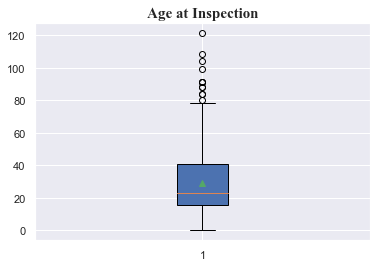

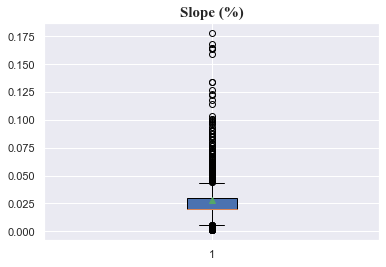

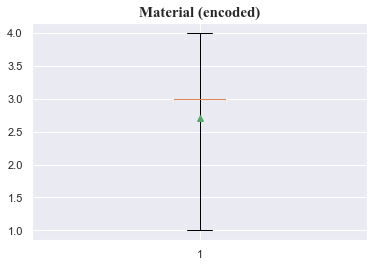

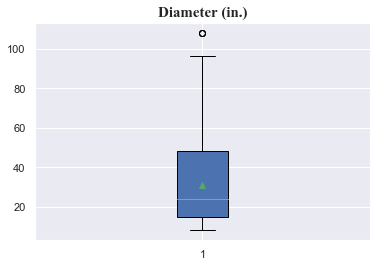

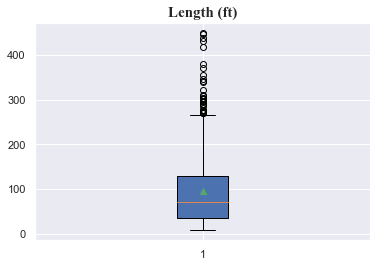

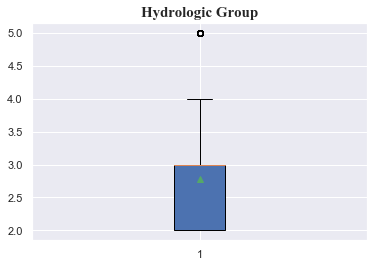

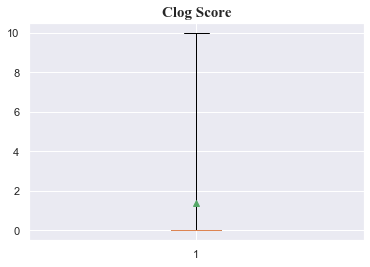

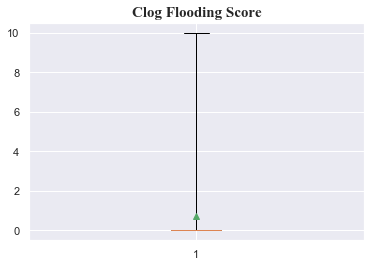

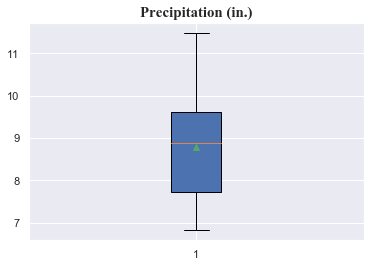

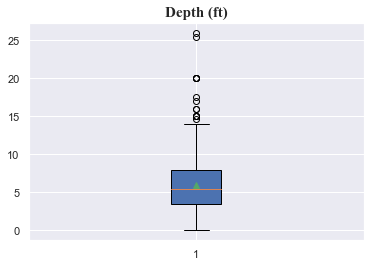

In [29]:
i=0
for column in data1:
    fig1, ax1 = plt.subplots()
    ax1.set_title(names[i], fontsize = 15,fontname='Times New Roman')
    ax1.boxplot(data1[column], showfliers=True , showmeans=True, labels =None, showcaps=True, autorange=True, patch_artist=True )
    #ax1.set(facecolor='cyan')
    #ax1.set_facecolor(None)
    #fig1.savefig(column +' boxplot.png', dpi=300, transparent=True, bbox_inches='tight')
    plt.show()
    i+=1

# Univariate Histogram - Seaborn

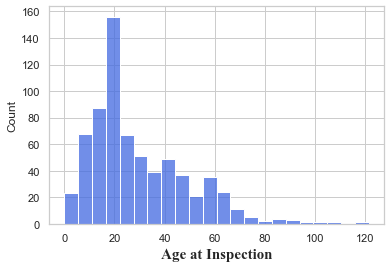

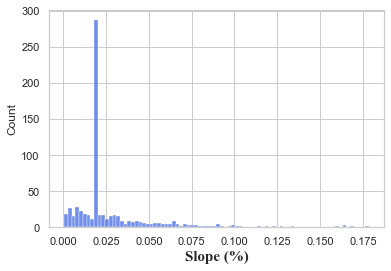

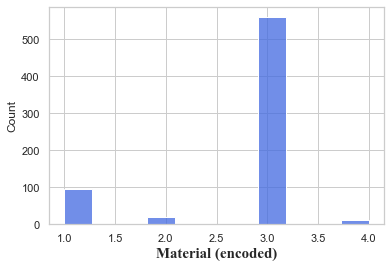

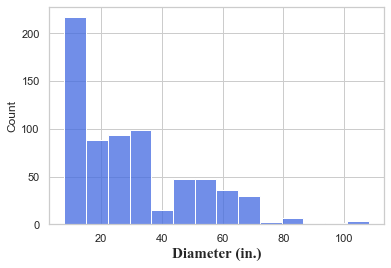

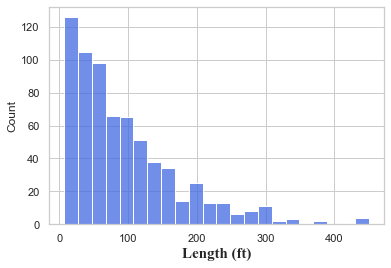

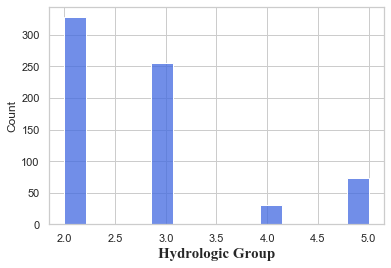

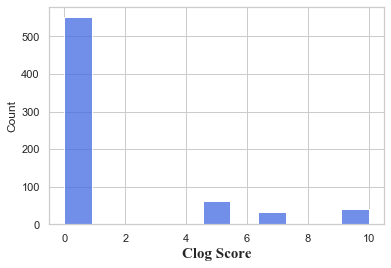

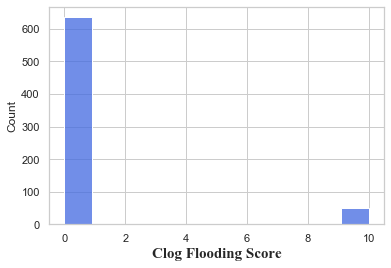

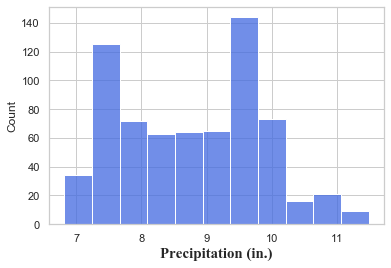

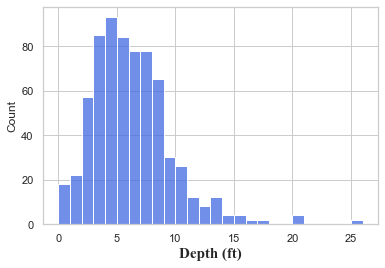

In [30]:
#seaborn version
i=0
for column in data1:
    sns.histplot(data1[column], color="royalblue", )
    plt.xlabel(names[i], fontsize = 15,fontname='Times New Roman' )
    #fig = plt.gcf()
    #fig.set_size_inches(8, 4)  #unit in inches!
    #plt.savefig(column +' histplot.png', dpi=300, transparent=True,bbox_inches='tight')
    plt.show()
    i+=1

# Univariate Histogram - Matplotlib

(array([312., 239., 104.,  22.,   9.]),
 array([ 0.    , 10.8216, 21.6432, 32.4648, 43.2864, 54.108 ]),
 <a list of 5 Patch objects>)

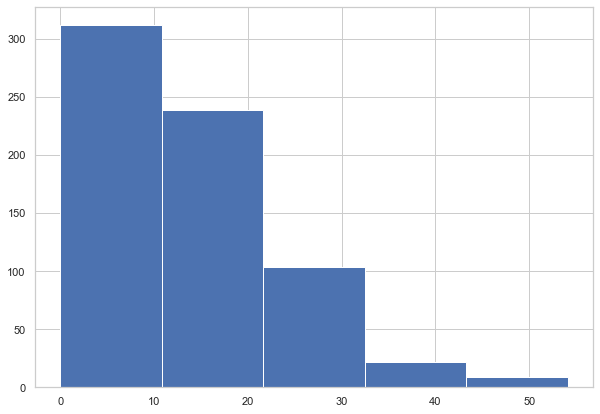

In [35]:
#matplotlib version
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y, bins=5) #bins values into 5 columns

# Univariate SWARM plot

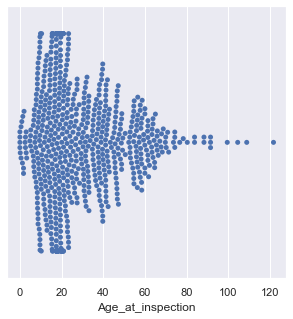

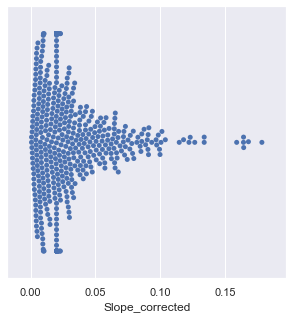

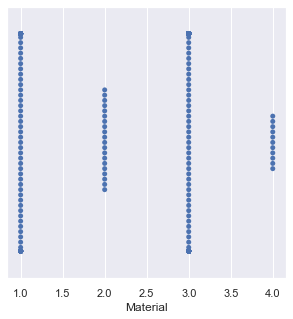

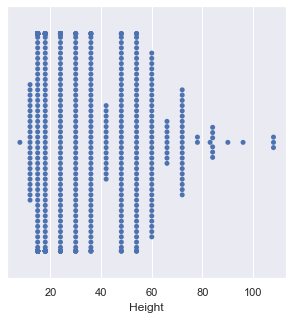

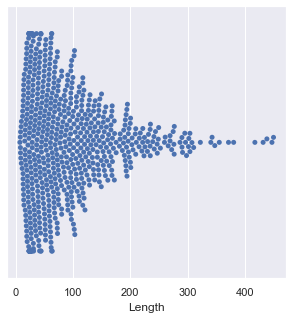

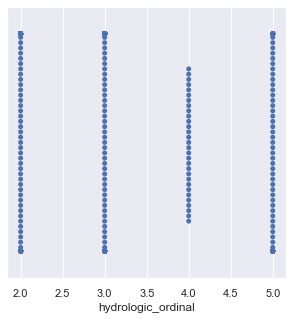

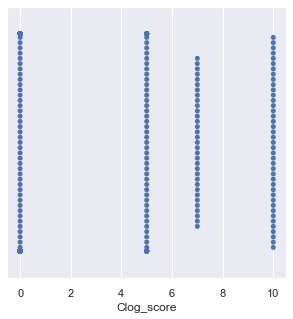

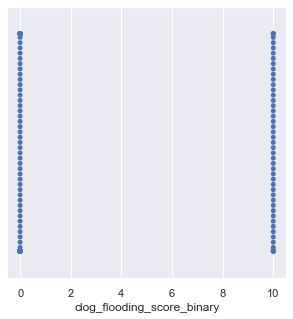

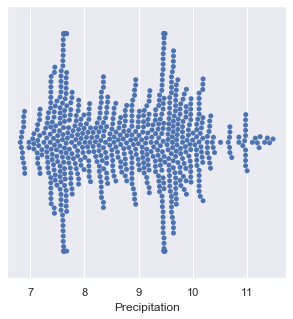

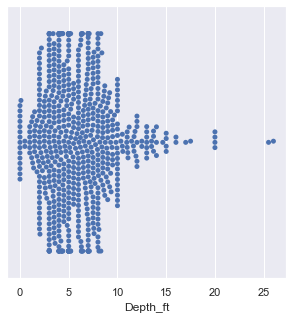

In [13]:
sns.set(rc={'figure.figsize':(5,5)})

for column in data1:
    sns.swarmplot(x=data1[column])
    plt.show()

# Density plot

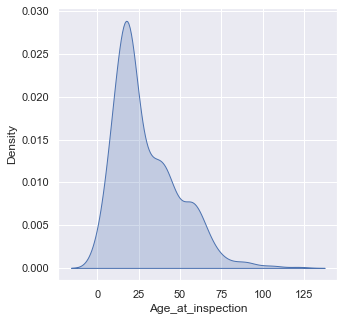

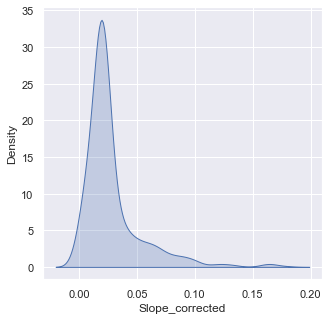

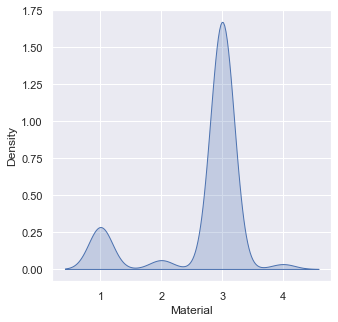

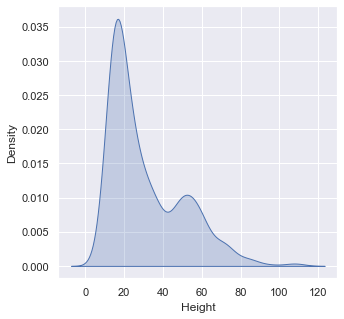

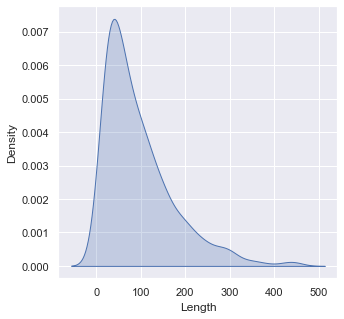

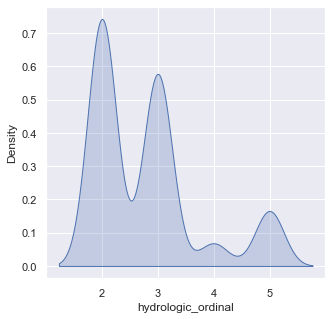

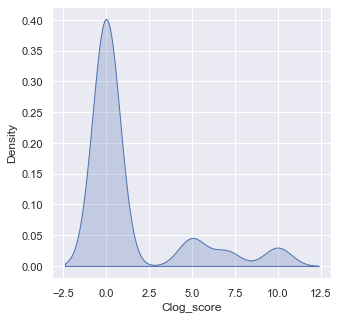

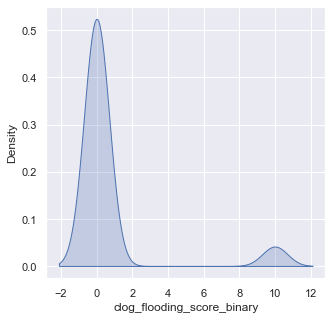

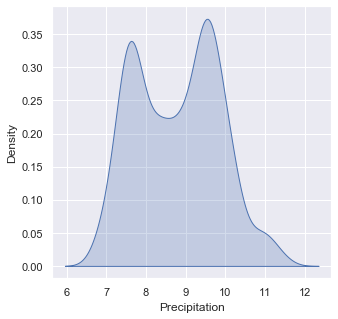

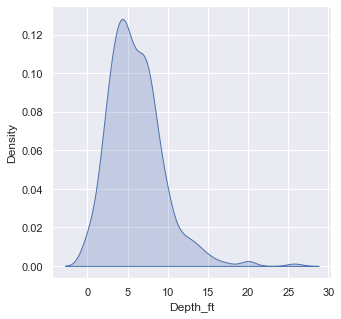

In [12]:
plt.figure(figsize=(5,5))
for column in data1:
    sns.kdeplot(data1[column],shade=True)
    plt.show()

# X-y scatter plots - Seaborn regplot()

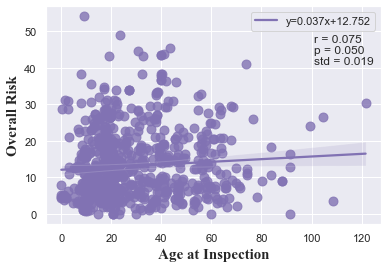

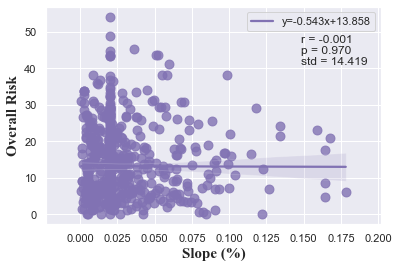

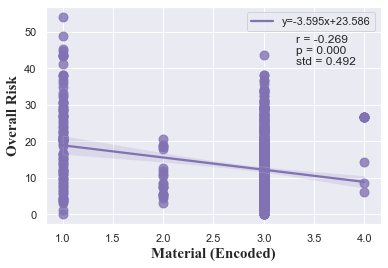

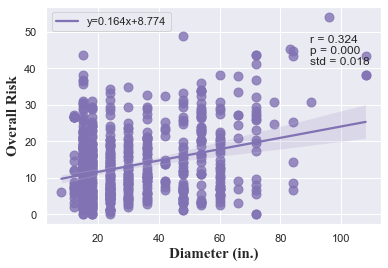

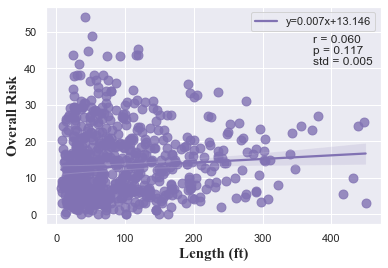

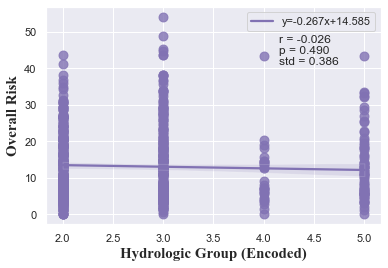

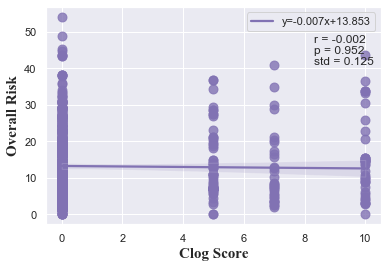

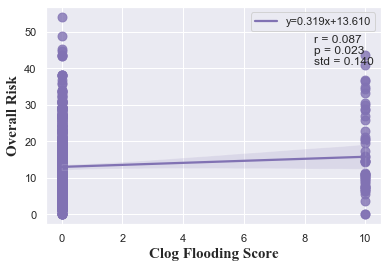

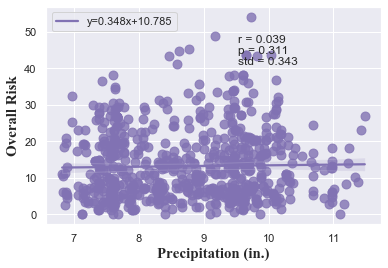

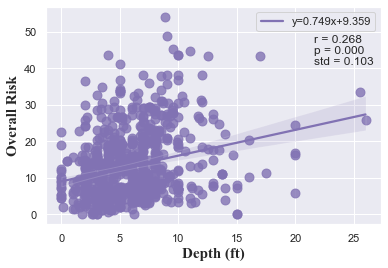

In [203]:
#regplot
#sns.set_theme(color_codes=True)
i=0
for column in data1:
    x=data1[column]
    slope, intercept, r, p, std = stats.linregress(x, y)
    ax = sns.regplot(x=column, y=y, data=data1,  scatter_kws={"s": 80}, robust=True, color='m',line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)})
    plt.ylabel('Overall Risk', fontsize = 15,fontname='Times New Roman' )
    plt.xlabel(names[i], fontsize = 15,fontname='Times New Roman' )
    plt.text(0.83*max(x), 47, 'r = {:.3f}'.format(r) , horizontalalignment='left', size='medium')
    plt.text(0.83*max(x), 44, 'p = {:.3f}'.format(p) , horizontalalignment='left', size='medium')
    plt.text(0.83*max(x), 41, 'std = {:.3f}'.format(std) , horizontalalignment='left', size='medium')
    ax.legend(loc="best")
    plt.savefig(column+' x_y regplot.png', dpi=300, bbox_inches='tight')
    plt.show()
    i+=1

# X-y scatter plots - Seaborn jointplot()

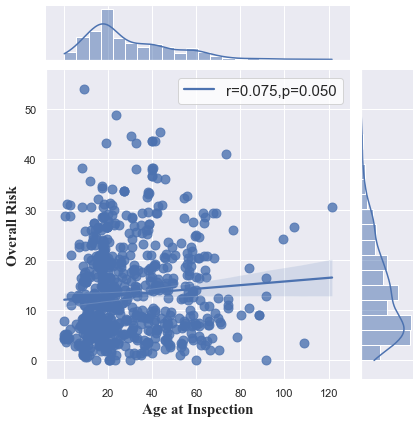

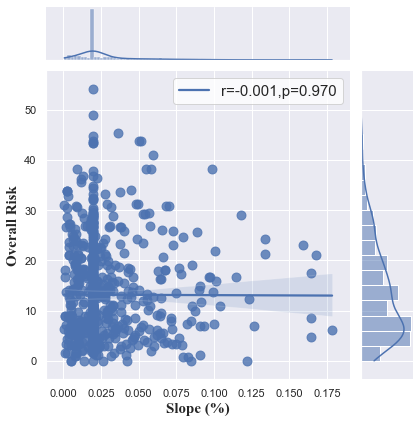

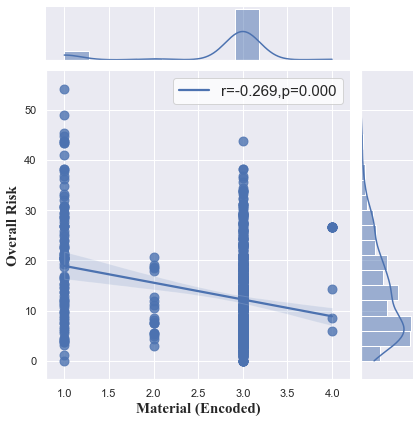

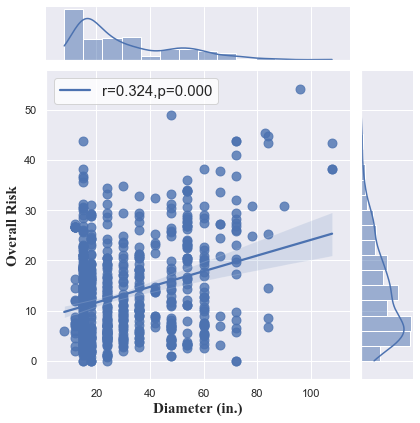

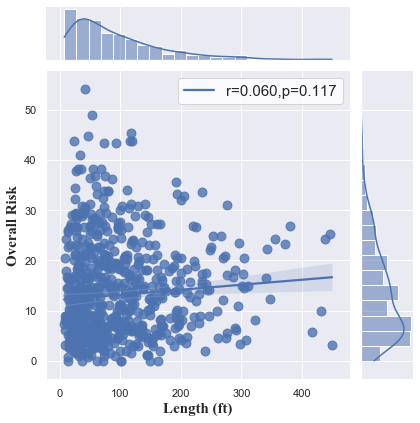

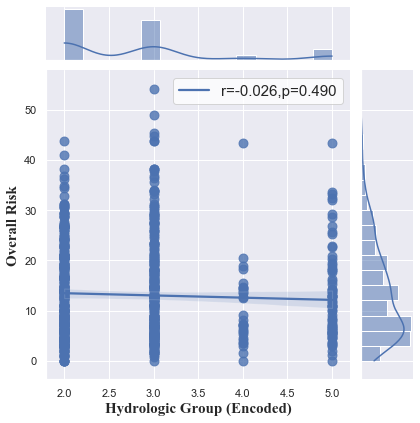

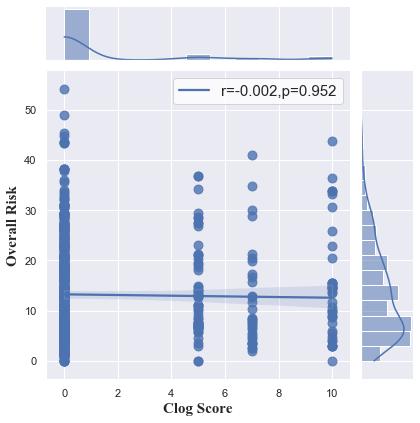

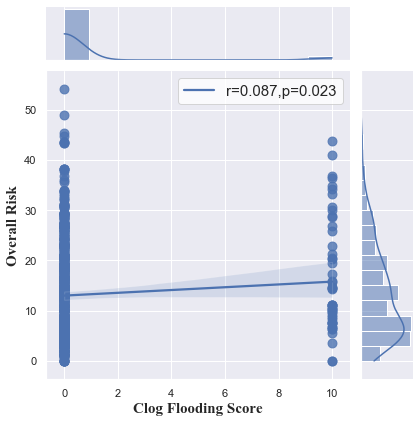

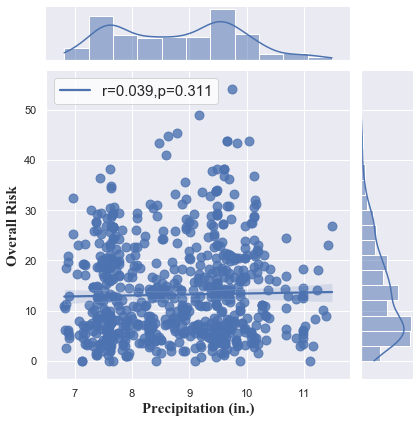

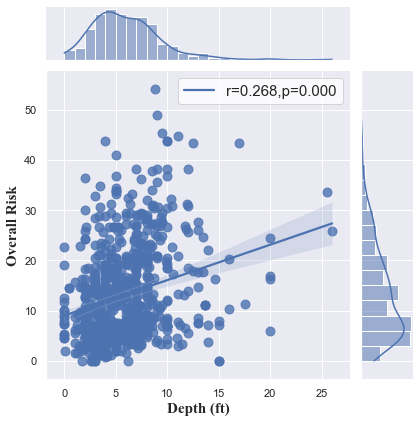

In [163]:
#jointplot() can use regplot() to show the linear regression fit on the joint axes by passing kind="reg"
#https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot
i=0
for column in data1:
    x=data1[column]
    r, p = stats.pearsonr(x, y)
    jp=sns.jointplot(x, y, data=data1, kind='reg', scatter_kws={"s": 80}, robust=True )
    jp.set_axis_labels(names[i], 'Overall Risk', fontsize = 15,fontname='Times New Roman')
    # if you choose to write your own legend, then you should adjust the properties then
    #phantom, = jp.ax_joint.plot([], [], linestyle="", alpha=0)
    # here graph is not a ax but a joint grid, so we access the axis through ax_joint method
    #jp.ax_joint.legend([phantom],['r={:.3f}, p={:.3f}'.format(r,p)],  fontsize = 15, facecolor='white')
    jp.ax_joint.legend(['r={:.3f},p={:.3f}'.format(r,p)])
    #plt.savefig(column+' x_y scatter with trends.png', dpi=300, bbox_inches='tight')
    plt.show()
    i+=1

#  X-y Kernel density estimate (KDE) Plots
A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.<br/>
https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot

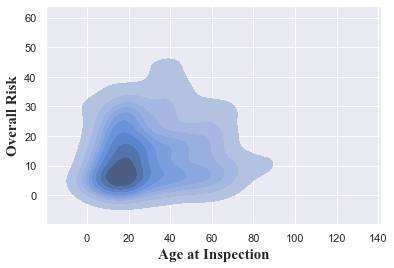

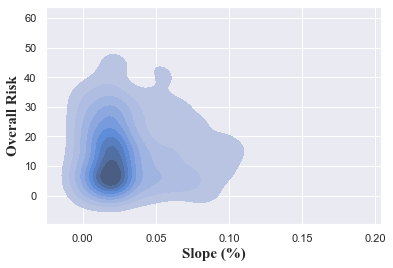

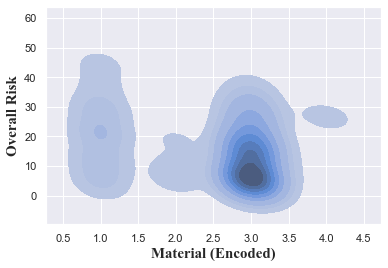

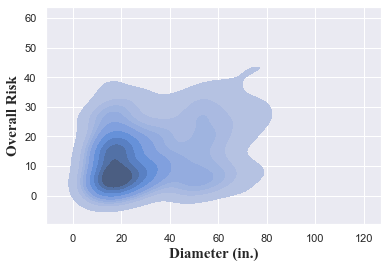

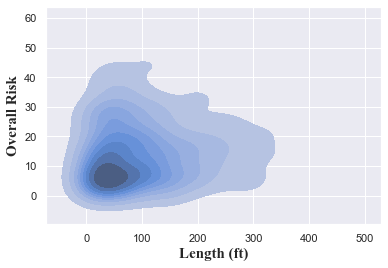

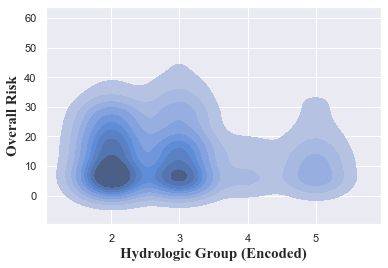

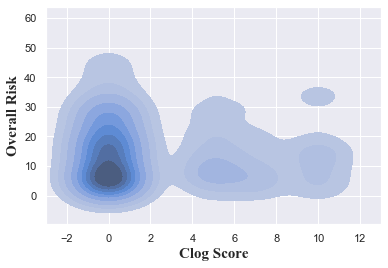

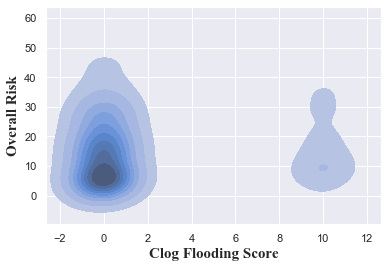

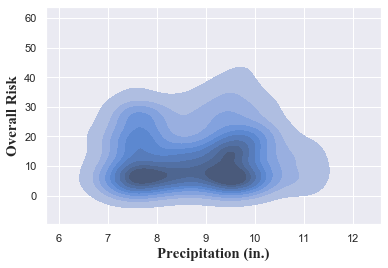

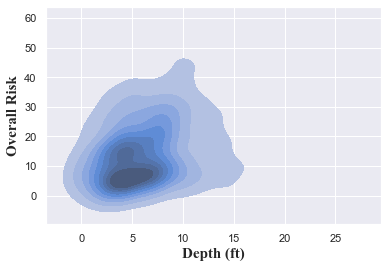

In [135]:
i=0
for column in data1:
    sns.kdeplot(data=data1, x=column, y=y, fill=True)
    plt.ylabel('Overall Risk', fontsize = 15,fontname='Times New Roman' )
    plt.xlabel(names[i], fontsize = 15,fontname='Times New Roman' )
    #plt.savefig(column+' KDE plot.png', dpi=300, transparent=True,bbox_inches='tight')
    plt.show()
    i+=1

# X-y line plot

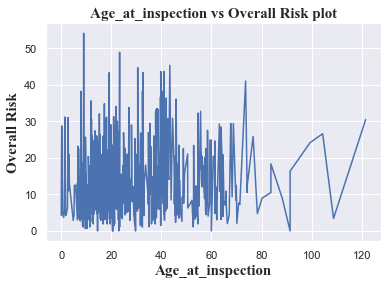

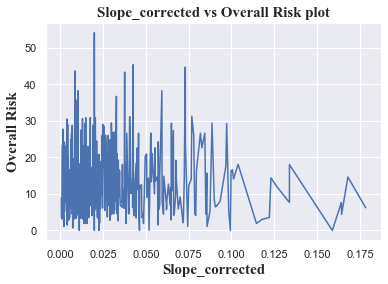

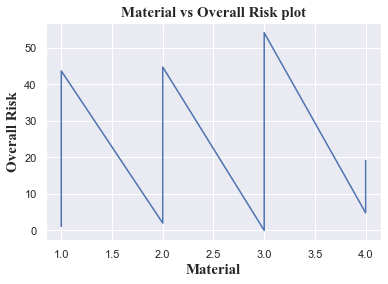

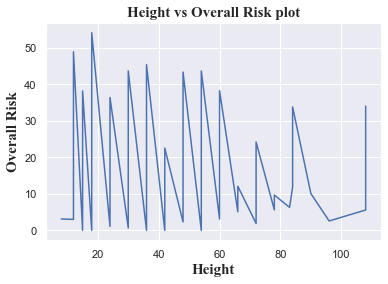

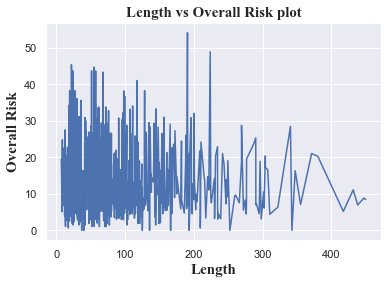

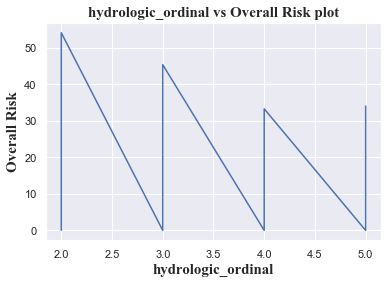

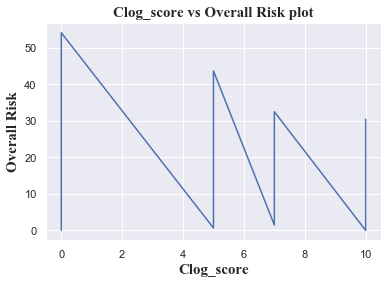

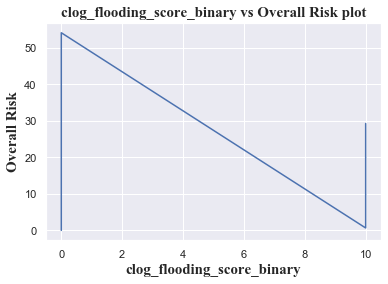

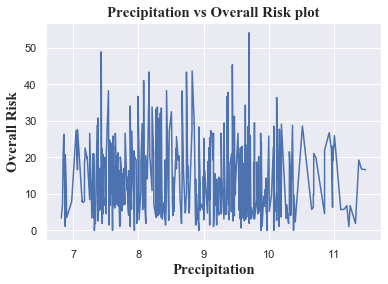

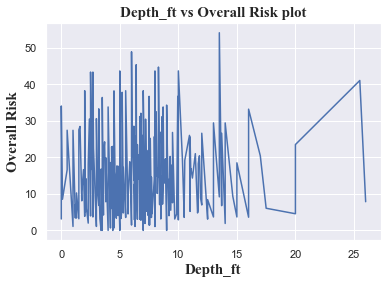

In [95]:
i=0
for column in data1:
    x=data1[column]
    #sort by x values to create ordered plot
    x, y= zip(*sorted(zip(x, y)))
    plt.xlabel(column, fontsize=15, fontname='Times New Roman')
    plt.ylabel('Overall Risk', fontsize=15, fontname='Times New Roman')
    plt.title(column + " vs Overall Risk plot", fontsize=15, fontname='Times New Roman')
    plt.plot(x, y)  
    #plt.savefig(column +' line plot.png', dpi=300, transparent=True,bbox_inches='tight')
    plt.show()
    i+=1

# X-y line plot 2

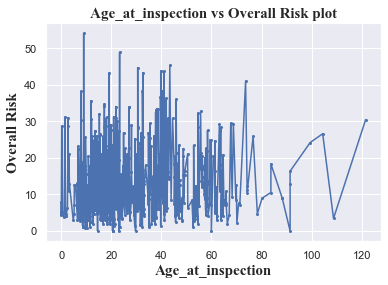

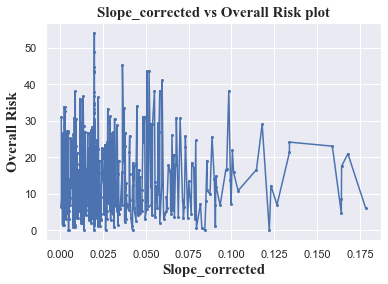

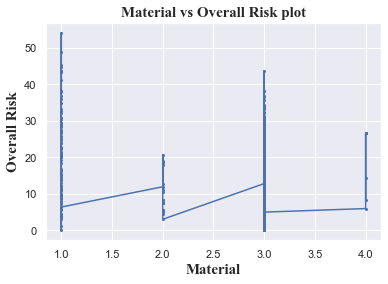

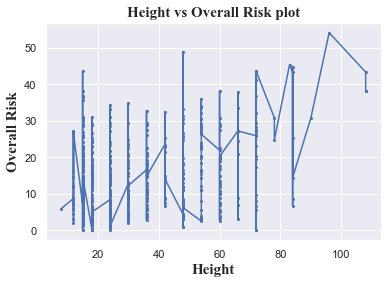

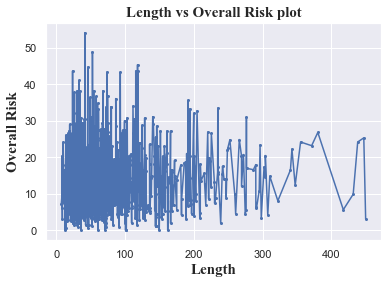

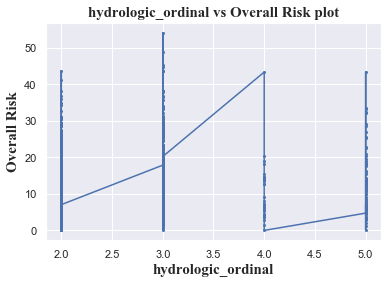

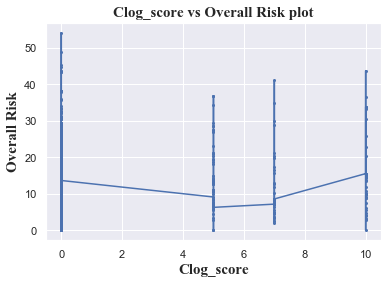

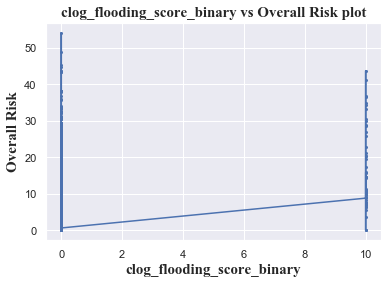

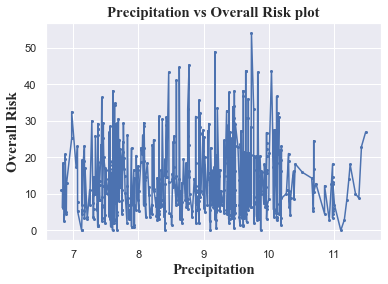

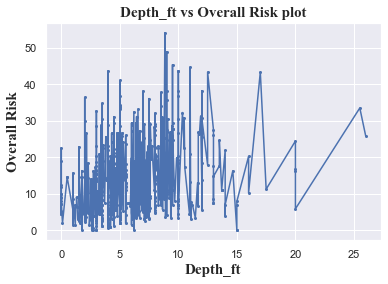

In [153]:
#different approach
i=0
for column in data1:
    x=data1[column]
    plt.xlabel(column, fontsize=15, fontname='Times New Roman')
    plt.ylabel('Overall Risk', fontsize=15, fontname='Times New Roman')
    plt.title(column + " vs Overall Risk plot", fontsize=15, fontname='Times New Roman')
    indices = np.argsort(x)
    plt.plot(x[indices], y[indices], '-bo', ms = 2)
    #plt.savefig(column +' seaborn line plot.png', dpi=300, transparent=True,bbox_inches='tight')
    plt.show()
    i+=1

# Plot filled polygons

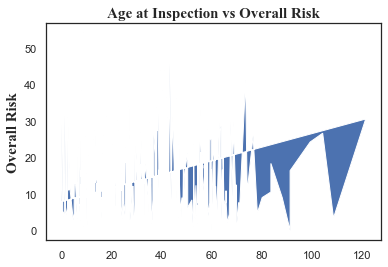

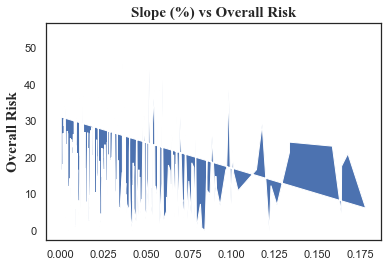

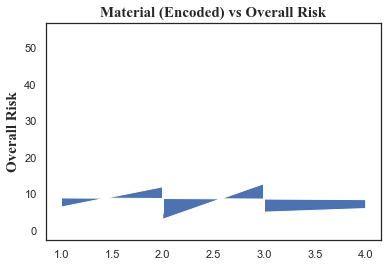

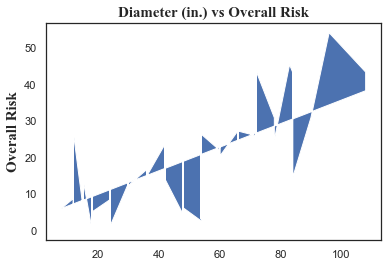

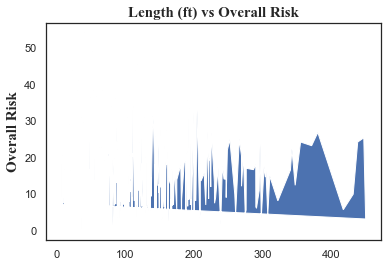

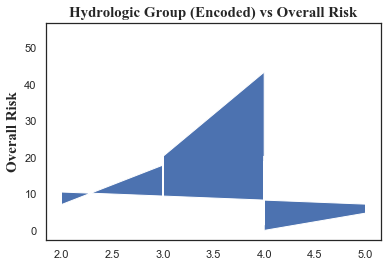

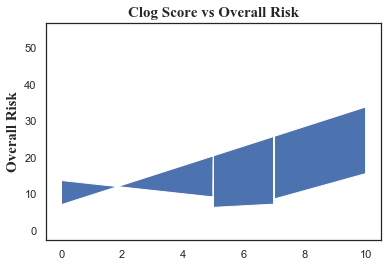

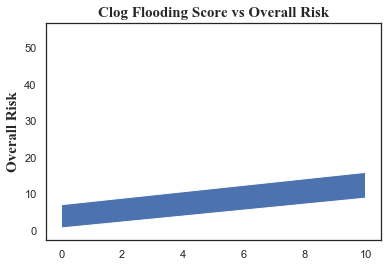

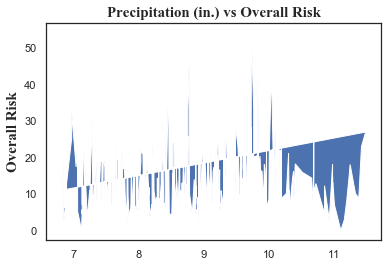

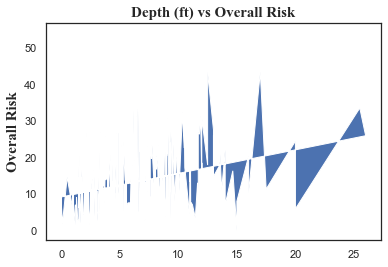

In [49]:
sns.set_style("white")
i=0
for column in data1:
    x=data1[column]
    fig, ax = plt.subplots(figsize =(6, 4))
    indices = np.argsort(x)
    ax.fill(x[indices], y[indices])
    plt.ylabel('Overall Risk', fontsize=15, fontname='Times New Roman')
    plt.title(names[i] + " vs Overall Risk", fontsize=15, fontname='Times New Roman')
    #plt.savefig(column +' filled polygon.png', dpi=300, transparent=True,bbox_inches='tight')
    plt.show()
    i+=1

# Bi-variate plot matrices

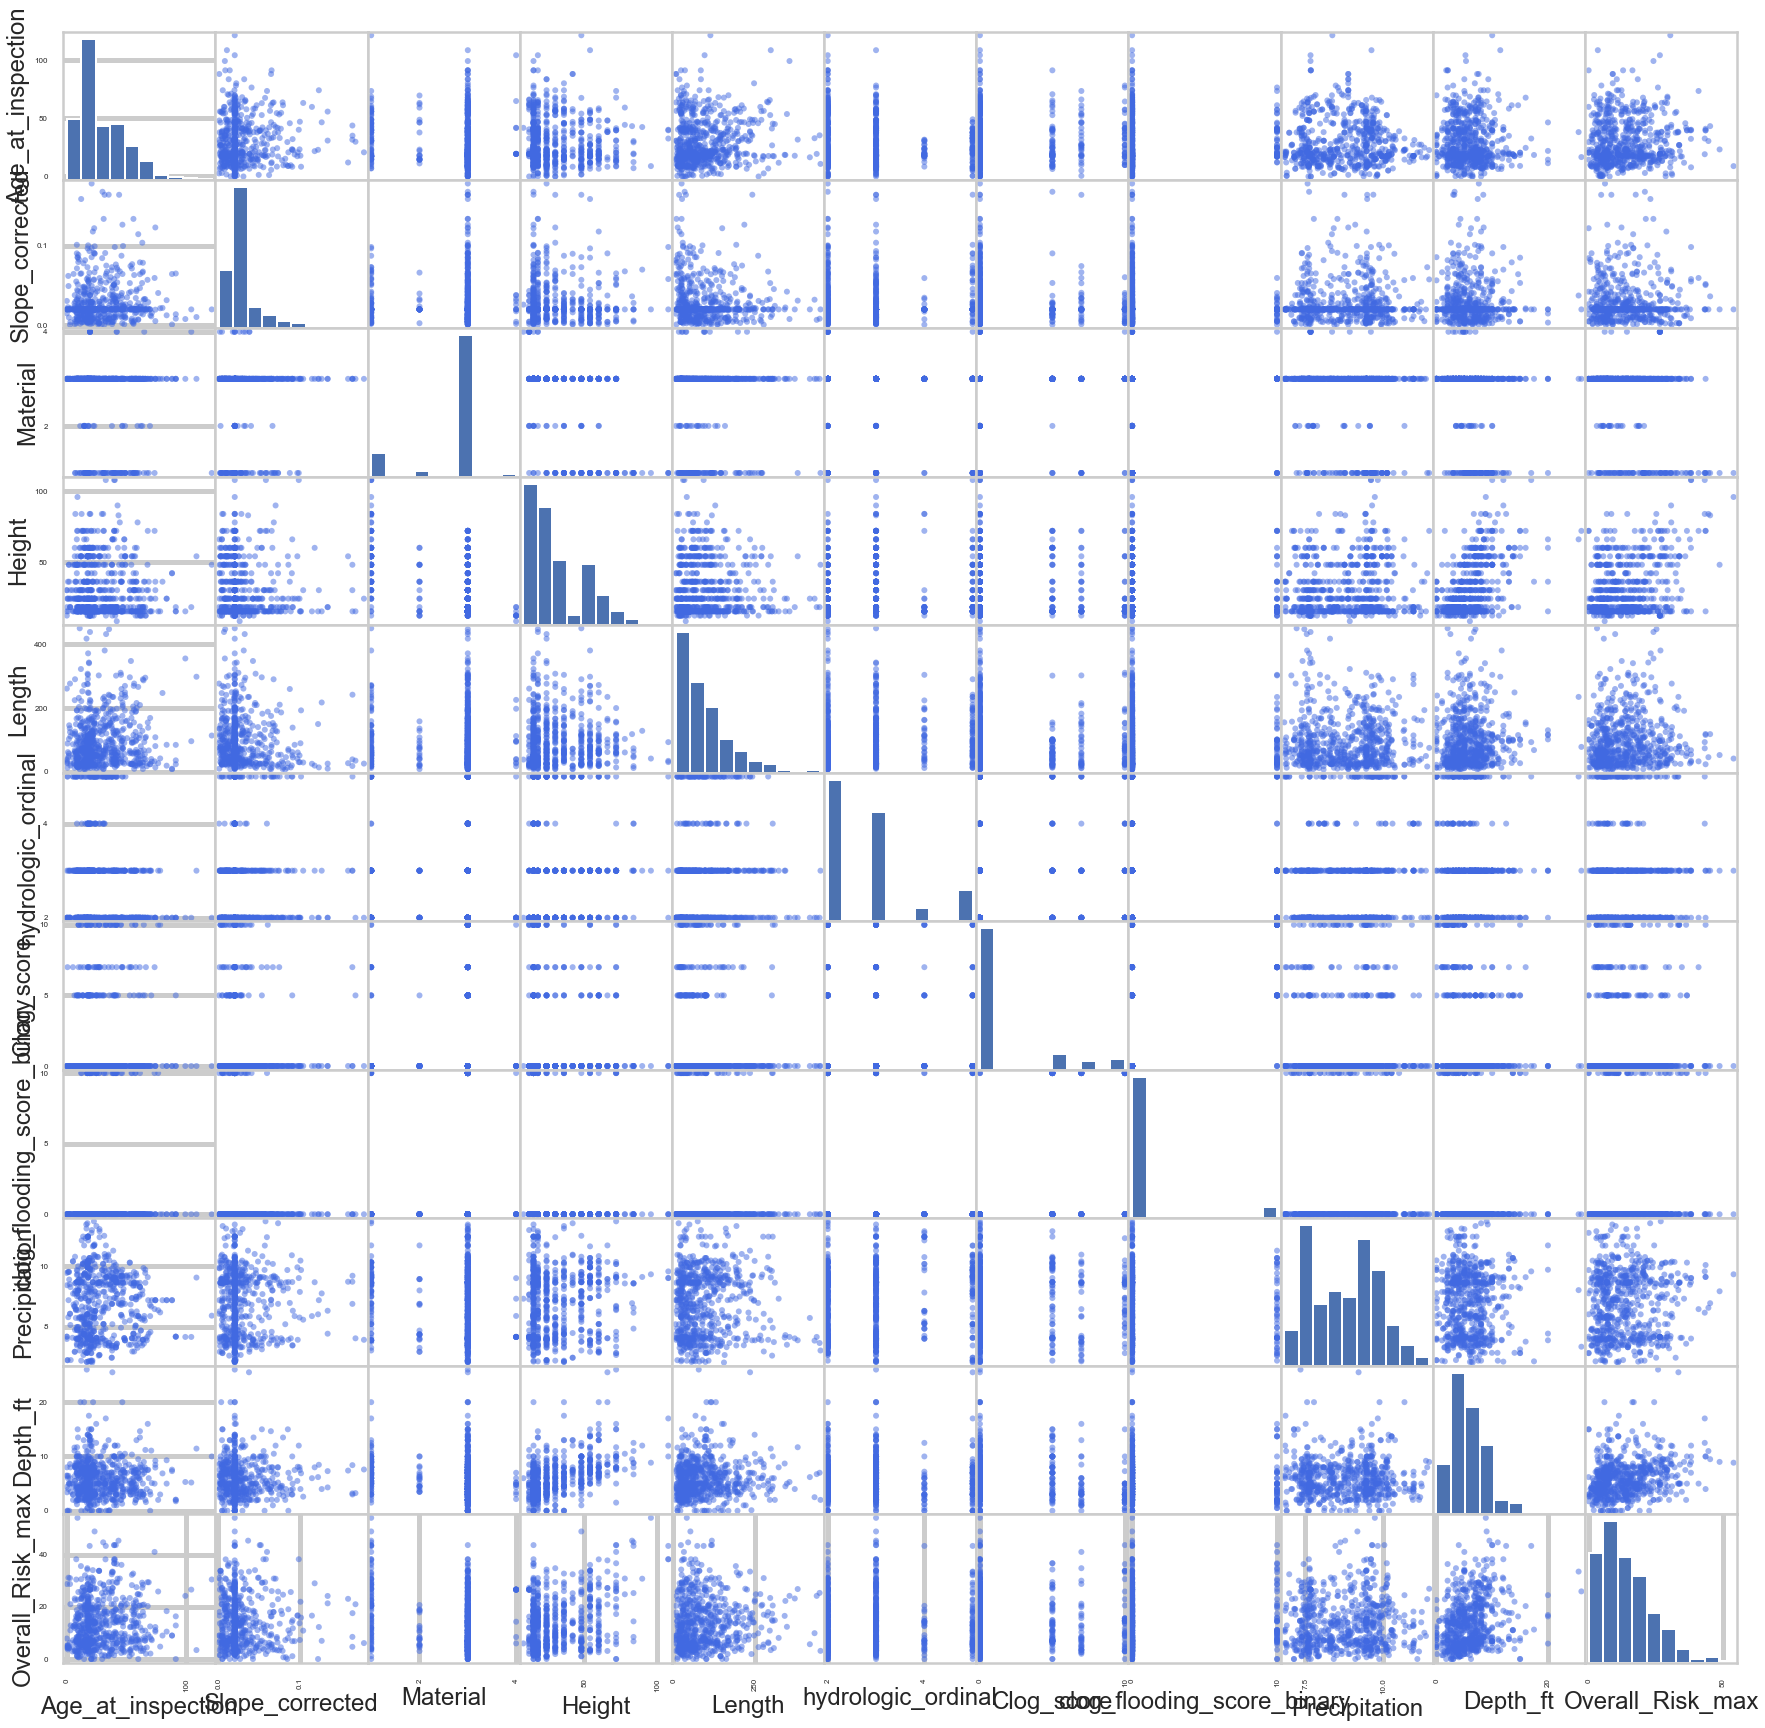

In [71]:
scatter_matrix(data1, color='royalblue', figsize=(30,30))#figsize in inches, not pixels
#plt.savefig('scatter matrix.png', dpi=300, transparent=True,bbox_inches='tight') # run this line to save plots
plt.show()

# Pie Chart

([<matplotlib.patches.Wedge at 0x14e22465d88>,
 [Text(-1.097405669199309, 0.07550362381513237, ''),
  Text(0.9432586213906232, -0.5659179915608454, ''),
  Text(0.6293282963978241, 0.9021895007995896, ''),
  Text(0.15065115068188784, 1.089634907112572, '')],
 [Text(-0.5985849104723503, 0.041183794808254015, '47.81'),
  Text(0.5145047025767036, -0.3086825408513702, '37.17'),
  Text(0.34326997985335855, 0.4921033640725034, '10.64'),
  Text(0.08217335491739335, 0.5943463129704937, '4.37')])

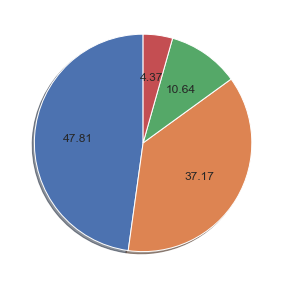

In [20]:
plt.pie(data1['hydrologic_ordinal'].value_counts(),startangle=90,autopct='%.2f',shadow=True)

#how to automatically add lables??

# Heatmap
https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html

In [210]:
data2=dataset[[ 'Age_at_inspection', 'Slope_corrected', 'Material', 'Height', 'Length', 
'hydrologic_ordinal', 'Clog_score', 'clog_flooding_score_binary', 'Precipitation', 'Depth_ft', 'Overall_Risk_max']]
map=data2.corr().round(3)
map.style.background_gradient(cmap='coolwarm')
# how to keep values rounded to 3 decimal places in the colored data frame???

# Confusion Matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions

In [ ]:
########## only can be used for ML models after prediction

# modify Y_test (actual values) and Y_pred (predicted values)
disp=ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)
# modify XX to the name of the model
disp.ax_.set_title('Confusion Matrix for XX', fontsize=15, fontname='Times New Roman')
plt.grid(False)
# modify XX to the name of the model
# run the line below to save plots
#plt.savefig('XX Baseline Confusion Matrix.png', transparent=True, dpi=300, bbox_inches='tight') 
plt.show()

# ROC Curves
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html<br/>
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py <br/>
https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification

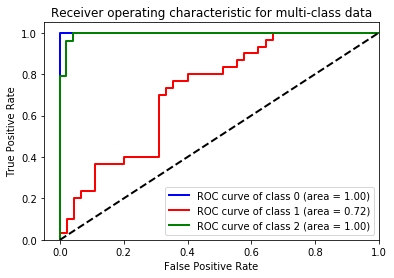

[[-3.58459897 -0.31176426  1.78242707]
 [-2.15411929  1.11402775 -2.393737  ]
 [ 1.89199335 -3.89624382 -6.29685764]
 [-4.52609987 -0.63389114  1.96065819]
 [ 1.39684192 -1.77742447 -6.26300472]
 [-4.29544529 -1.45403694  3.29458805]
 [ 1.60323992 -2.10436714 -6.37623283]
 [-2.65028866 -1.23856217 -0.51739315]
 [-2.86540149 -0.51680531 -0.7183625 ]
 [-1.98461469 -0.42890191 -1.70646586]
 [-3.74016002  0.49686389  0.82186705]
 [-2.38375773 -1.40495745 -0.60548048]
 [-2.64026621 -0.18330583 -0.76615536]
 [-2.6974942  -0.48066147 -0.71100338]
 [-2.68086321 -0.48075311 -0.42256446]
 [ 1.65255174 -2.20173405 -6.40562627]
 [-2.52210662 -0.53055015 -0.52952971]
 [-2.41636546  0.45117003 -0.99069072]
 [ 1.25101273 -0.81698465 -6.36116848]
 [ 1.74739869 -3.24458567 -6.25493848]
 [-3.18923262 -0.1604106   1.00089508]
 [-2.45158845 -0.59284356 -0.24998163]
 [ 1.00481639 -1.56922072 -5.5277339 ]
 [ 1.26350425 -0.37929165 -6.32976484]
 [-3.02357691 -0.38552687  0.20999377]
 [ 2.02104714 -2.22672165

In [12]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()
#print(y_score)